# Part II - (Effects of Loan Characteristics on Borrower's APR)



## Investigation Overview


With focus on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income;  I wanted to look at the characteristics of loans that could be used to predict their borrower APR.

## Dataset Overview

The dataset consists of attributes of 113,937 loans and borrower APRs. The attributes includs original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as debt to income ratio, current loan status, borrower's employment status, etc. 352 data points were removed from the analysis due to very large stated monthly income seemed as outliers and missing borrower APR information.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData1.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'StatedMonthlyIncome','BorrowerAPR',  'ProsperRating (Alpha)','Term', 
        'EmploymentStatus']
loan_sub = loans[cols]

In [4]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]

In [5]:
# remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]

In [17]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(113585, 6)

## Distribution of Original Loan Amount

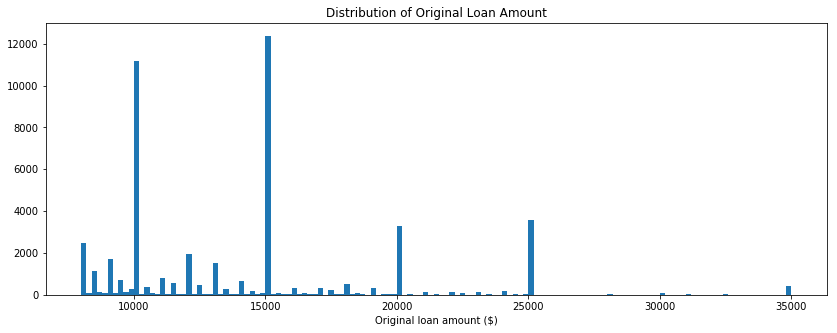

In [15]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[14, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.title('Distribution of Original Loan Amount');

The very large spikes in frequency are at 10k, 15k, 20k and 25k. There are also small spikes at 7k,8k,9k,11k,12k,13k etc. This means that most of the loans are multiples of 1k.

## Distribution of Borrower APR

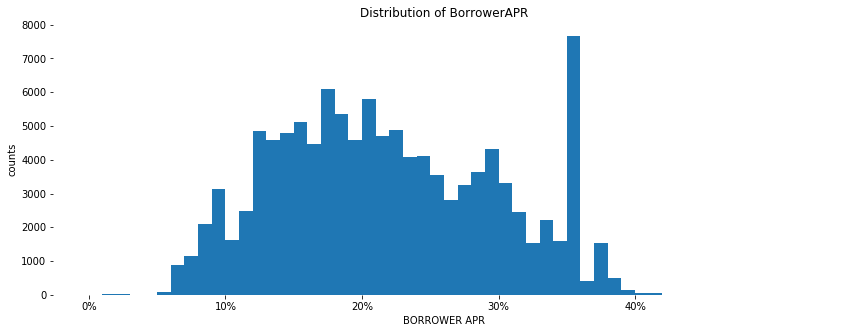

In [18]:
plt.figure(figsize = [14, 5])

# Create bin sizes
bins = np.arange(0, loans.BorrowerAPR.max()+0.01, 0.01)

# Plot distribution of BorrowerAPR
plt.hist(data=loans, x='BorrowerAPR', bins=bins, range=(bins.min(),bins.max()))
plt.xlabel('BORROWER APR')
plt.ylabel('counts')
sb.despine(left=True, bottom=True)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.title("Distribution of BorrowerAPR");

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

## Borrower APR vs. Loan Amount

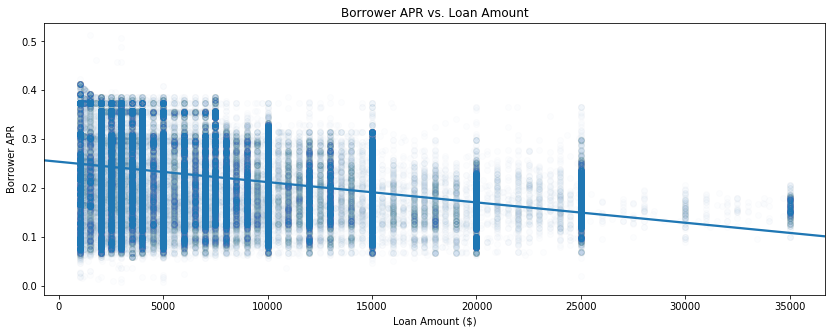

In [19]:
plt.figure(figsize = [14, 5])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

## Borrower APR vs. Prosper Rating

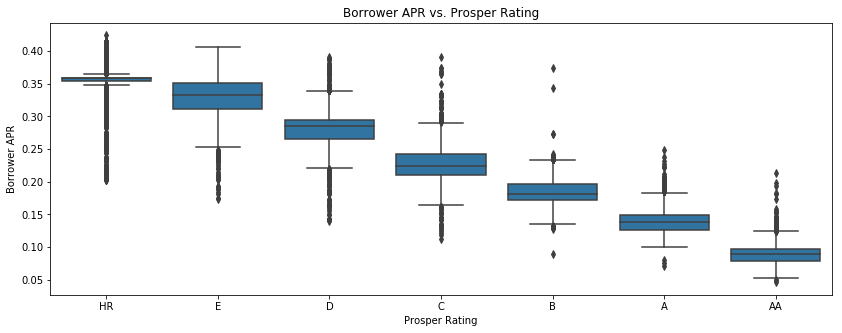

In [27]:
plt.figure(figsize=[14,5])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

## Prosper Rating Effect on Relationship between APR and Loan Amount

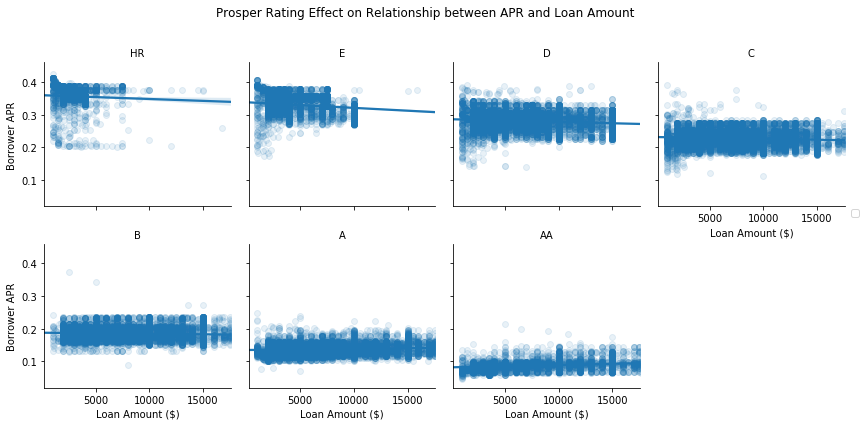

In [11]:
g=sb.FacetGrid(data=loan_sub,col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This is may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

## Borrower APR by Rating and Term

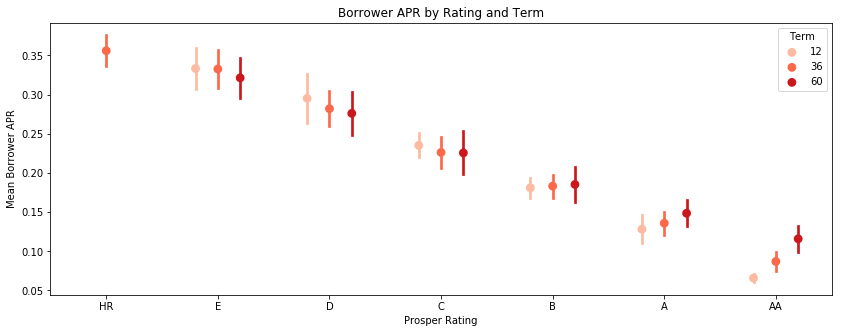

In [22]:
fig = plt.figure(figsize = [14,5])
ax = sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

### Conclusion
In Summary, the borrower APR decrease with increase of loan amount. Prosper rating has a strong effect on borrower APR.  People with A or AA ratings tend to borrow more money